In [67]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [68]:
data_path = '..\data\interim\dataset_2017_2018[Preprocess].csv'
df_data_2017_2018 = pd.read_csv(data_path)
data_path = '..\data\external\dados_cetesb_2020.csv'
df_data_2020 = pd.read_csv(data_path)
df_data = pd.concat([df_data_2017_2018,df_data_2020])

In [69]:
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data

,Temperatura,Umidade
ts,,
2017-01-01 00:00:00,21.458000,86.760000
2017-01-01 01:00:00,21.828333,83.500000
2017-01-01 02:00:00,21.281667,87.716667
2017-01-01 03:00:00,20.755000,91.250000
2017-01-01 04:00:00,20.731667,90.300000
...,...,...
2020-05-31 19:00:00,19.800000,36.000000
2020-05-31 20:00:00,16.700000,47.000000
2020-05-31 21:00:00,15.100000,54.000000


In [70]:
def get_humidex(T,H):
    z = 6.112*(10**((7.5*T)/(237.7+T)))*(H/100)
    return T+((5/9)*(z-10))

df_data['Humidex'] = get_humidex(df_data['Temperatura'].values,df_data['Umidade'].values)
df_data

,Temperatura,Umidade,Humidex
ts,,,
2017-01-01 00:00:00,21.458000,86.760000,28.211429
2017-01-01 01:00:00,21.828333,83.500000,28.390057
2017-01-01 02:00:00,21.281667,87.716667,28.037330
2017-01-01 03:00:00,20.755000,91.250000,27.599527
2017-01-01 04:00:00,20.731667,90.300000,27.429513
...,...,...,...
2020-05-31 19:00:00,19.800000,36.000000,18.856689
2020-05-31 20:00:00,16.700000,47.000000,16.102868
2020-05-31 21:00:00,15.100000,54.000000,14.688281


<IPython.core.display.Javascript object>


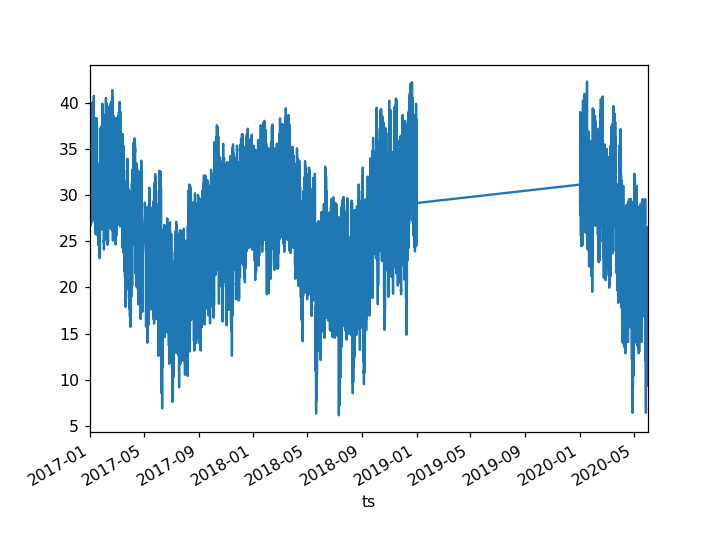

In [71]:
df_data['Humidex'].plot()

In [72]:
nivel = []
humidex_values = df_data['Humidex'].values
for h in humidex_values:
    if h<=29: 
        nivel.append('comfortable')
    elif h<=39: 
        nivel.append('some discomfort')
    elif h<=45: 
        nivel.append('great discomfort')
    else: 
        nivel.append('dangerous')
df_data['Nivel'] = nivel

In [73]:
(df_data.Nivel=='great discomfort').sum()

199

In [74]:
df_H = df_data[['Humidex']].copy()
df_H['interval'] = df_H.index.time
df_H.index = df_H.index.date
df_pivot_H = df_H.pivot(columns='interval')
df_pivot_H = df_pivot_H.dropna()

In [75]:
df_pivot_H

Humidex                                                         \
interval     00:00:00   01:00:00   02:00:00   03:00:00   04:00:00   05:00:00   
2017-01-01  28.211429  28.390057  28.037330  27.599527  27.429513  27.478603   
2017-01-02  29.081057  28.542816  27.888466  27.821665  27.336513  26.697399   
2017-01-03  29.583827  29.203598  28.931031  28.573913  28.587000  28.464002   
2017-01-04  28.298675  27.696132  27.235239  27.110961  27.437519  27.519342   
2017-01-05  31.416974  31.331718  31.060982  30.838037  29.965732  29.679887   
...               ...        ...        ...        ...        ...        ...   
2020-05-27  14.644382  11.480943   8.997995   7.973383   7.767785   6.782759   
2020-05-28  14.625015  13.443043  12.719469  11.854189  11.307924   9.896346   
2020-05-29  13.527725  14.148866  13.235002  12.719469  12.175348  11.692325   
2020-05-30  13.887804  13.613622  12.824690  12.440218  11.382767  10.983674   
2020-05-31  12.824690  12.795084  11.991289  11.931035  11.394931  10.854423   

                                                        ...             \
interval     06:00:00   07:00:00   08:00:00   09:00:00  ...   14:00:00   
2017-01-01  27.865062  30.922080  33.243550  34.758886  ...  37.112106   
2017-01-02  27.655248  28.847708  31.446969  34.926794  ...  37.801067   
2017-01-03  28.766867  31.538068  34.456579  36.787640  ...  39.799068   
2017-01-04  27.629404  28.493021  30.121089  31.508817  ...  35.229504   
2017-01-05  30.753258  32.972058  34.163906  35.225972  ...  33.065021   
...               ...        ...        ...        ...  ...        ...   
2020-05-27   6.639465   6.419949   9.018696  14.172663  ...  21.374026   
2020-05-28  10.232020   9.290381  10.854423  13.785415  ...  21.744657   
2020-05-29  11.142114  10.727182  12.557050  15.385981  ...  24.791106   
2020-05-30  10.645793  10.443523  11.745528  15.040026  ...  25.585833   
2020-05-31  10.717240  11.959823  15.271636  19.783680  ...  25.996620   

                                                                              \
interval     15:00:00   16:00:00   17:00:00   18:00:00   19:00:00   20:00:00   
2017-01-01  37.329167  36.346139  33.787075  28.282810  28.564218  28.799545   
2017-01-02  38.886947  37.097700  36.670188  35.305760  32.934560  32.518408   
2017-01-03  39.365378  36.042456  32.452484  32.725149  31.914443  30.994246   
2017-01-04  33.817783  36.624941  35.994808  34.561864  32.872029  32.730542   
2017-01-05  33.454441  33.519411  34.235118  34.100284  31.928876  30.954963   
...               ...        ...        ...        ...        ...        ...   
2020-05-27  22.153984  22.746685  21.515534  18.813309  16.555077  15.915897   
2020-05-28  22.940362  23.308785  23.236624  20.176052  18.726430  17.579284   
2020-05-29  26.422077  26.296009  25.359231  22.153984  20.124817  18.852970   
2020-05-30  25.935072  26.515073  26.128440  23.408568  21.822050  19.765117   
2020-05-31  25.424156  24.538837  21.807080  19.996820  18.856689  16.102868   

                                             
interval     21:00:00   22:00:00   23:00:00  
2017-01-01  28.886296  28.749886  29.046273  
2017-01-02  30.447610  30.292165  30.155720  
2017-01-03  28.452908  26.948674  28.122324  
2017-01-04  32.468668  32.280141  31.880592  
2017-01-05  30.251804  30.746057  30.347247  
...               ...        ...        ...  
2020-05-27  14.991135  15.364472  15.817937  
2020-05-28  16.361154  15.282457  15.379565  
2020-05-29  16.181168  15.552544  14.443239  
2020-05-30  17.739786  16.881992  15.069306  
2020-05-31  14.688281  13.633891  13.762451  

[882 rows x 24 columns]

In [76]:
df_pivot_H['Humidex'].to_csv('..\data\processed\\time_series[Transformation].csv',index_label='ts')